## ***Netflix Customer Churn Prediction***





In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv('netflix_customer_churn.csv')
df

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi


In [122]:
# Size of Dataset
df.shape

(5000, 14)

In [123]:
df.columns

Index(['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours',
       'last_login_days', 'region', 'device', 'monthly_fee', 'churned',
       'payment_method', 'number_of_profiles', 'avg_watch_time_per_day',
       'favorite_genre'],
      dtype='object')

In [124]:
# Null Values
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [125]:
# Duplicates
df.duplicated().sum()

np.int64(0)

In [126]:
df = df.drop('customer_id',axis = 1)

# ***EDA***

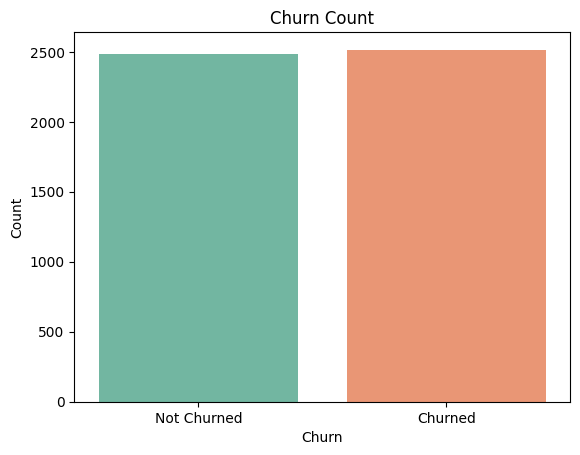

In [127]:
sns.countplot(data = df,x = 'churned',palette='Set2')
plt.title('Churn Count')
plt.xticks(ticks = [0,1],labels = ['Not Churned','Churned'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

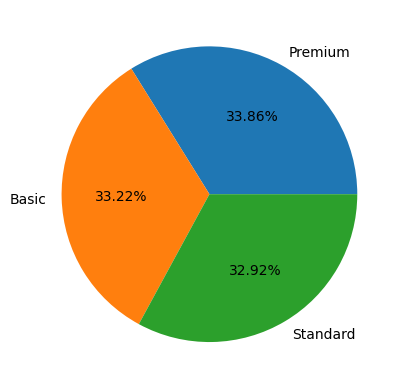

In [128]:
plt.pie(df['subscription_type'].value_counts(),autopct='%0.2f%%',labels = df['subscription_type'].value_counts().index)
plt.show()

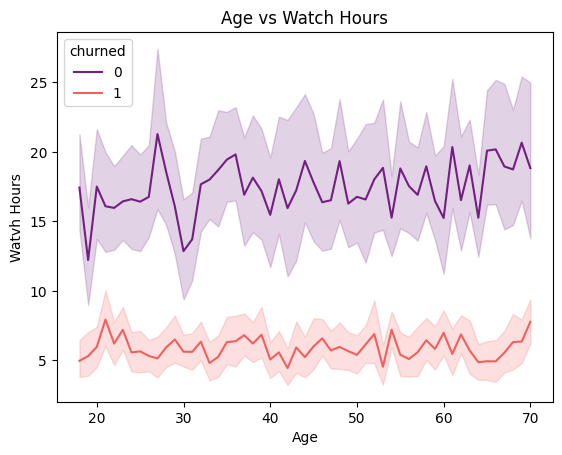

In [129]:
sns.lineplot(x = 'age',y = 'watch_hours',data = df,hue = 'churned',palette='magma')
plt.xlabel('Age')
plt.ylabel('Watvh Hours')
plt.title('Age vs Watch Hours')
plt.show()

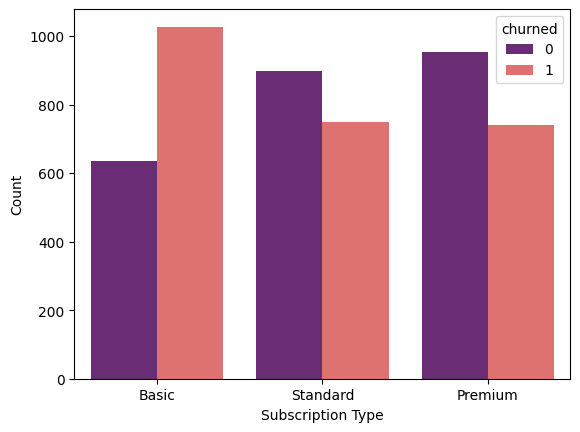

In [130]:
sns.countplot(data = df,x = 'subscription_type',hue = 'churned',palette='magma')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

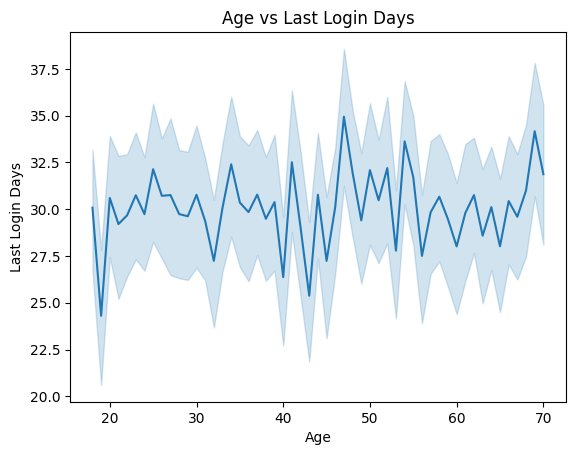

In [131]:
sns.lineplot(x = 'age',y = 'last_login_days',data = df,palette='magma')
plt.xlabel('Age')
plt.ylabel('Last Login Days')
plt.title('Age vs Last Login Days')
plt.show()

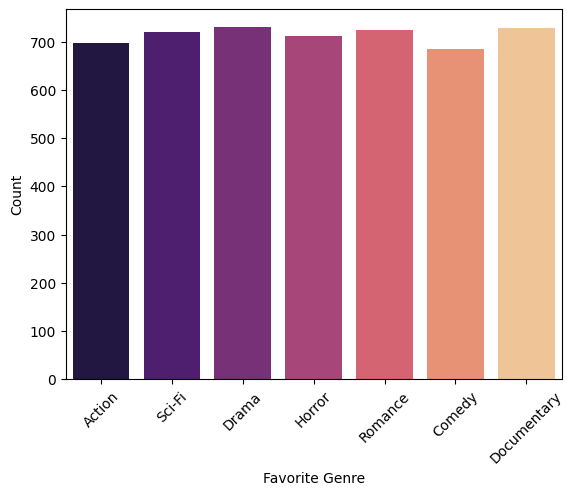

In [132]:
sns.countplot(x = 'favorite_genre',data = df,palette='magma')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

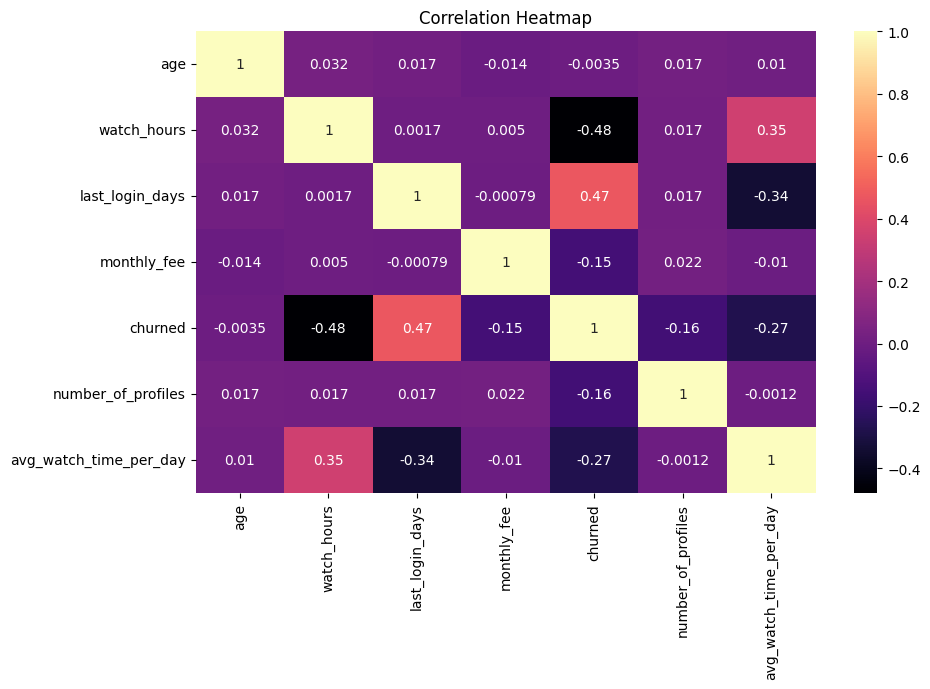

In [133]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

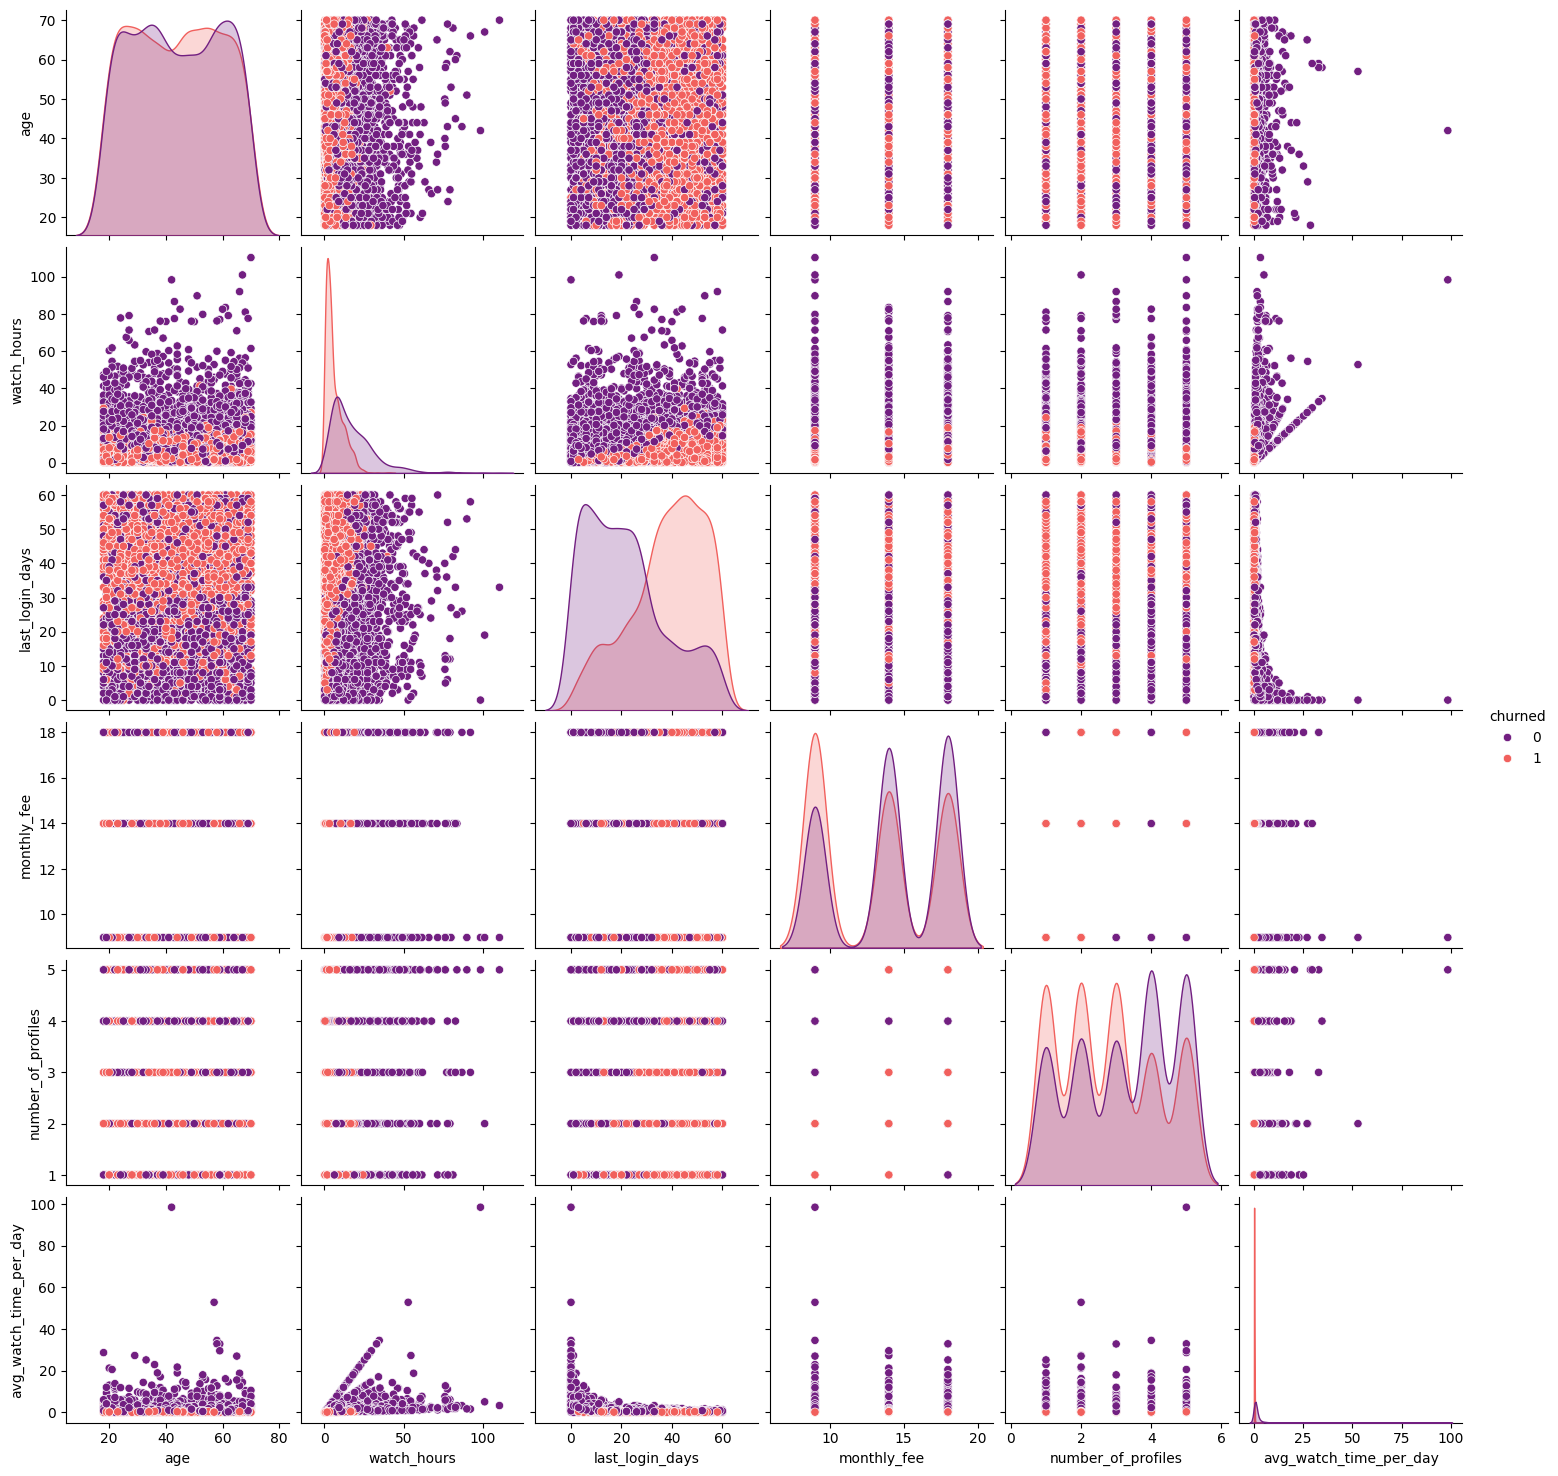

In [134]:
sns.pairplot(df,hue='churned',palette='magma')
plt.show()

# ***Feature Scaling***

In [135]:
cat_cols = df.select_dtypes(include='object').columns

In [136]:
df_encoded = pd.get_dummies(df, columns=cat_cols,drop_first=True,dtype=int)

In [137]:
df_encoded

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,1,0.49,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,47,0.70,19,13.99,1,5,0.03,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,27,16.32,10,13.99,0,2,1.48,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,53,4.51,12,17.99,1,2,0.35,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,56,1.89,13,13.99,1,2,0.13,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,49.17,11,8.99,0,4,4.10,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4996,67,9.24,2,8.99,0,3,3.08,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4997,66,16.55,49,13.99,1,2,0.33,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4998,59,9.12,3,8.99,0,4,2.28,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [138]:
df_encoded.shape

(5000, 30)

In [139]:
X = df_encoded.drop('churned',axis = 1)
y = df_encoded['churned']

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ***Model Building***

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [143]:
# Build ANN Model

model = Sequential()


model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [144]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [146]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5480 - loss: 0.6951 - val_accuracy: 0.7920 - val_loss: 0.5689
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6998 - loss: 0.5789 - val_accuracy: 0.8496 - val_loss: 0.3673
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8076 - loss: 0.4198 - val_accuracy: 0.8776 - val_loss: 0.2829
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.3459 - val_accuracy: 0.8936 - val_loss: 0.2533
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.3270 - val_accuracy: 0.8960 - val_loss: 0.2405
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8848 - loss: 0.2884 - val_accuracy: 0.8960 - val_loss: 0.2329
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8885 - loss: 0.2775 - val_accuracy: 0.8984 - val_loss: 0.2245
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8945 - loss: 0.2716 - val_accuracy: 0

In [147]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [160]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%")
print(f"Recall: {round(recall_score(y_test, y_pred),2)*100}%")
print(f"Precision: {round(precision_score(y_test, y_pred),2)*100}%")

Accuracy: 91.68%
Recall: 93.0%
Precision: 91.0%


In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       622
           1       0.91      0.93      0.92       628

    accuracy                           0.92      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.92      0.92      0.92      1250



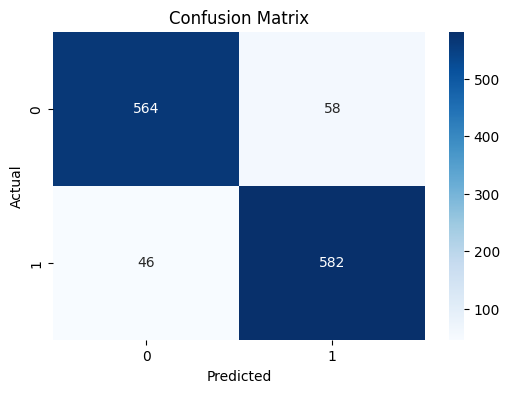

In [150]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

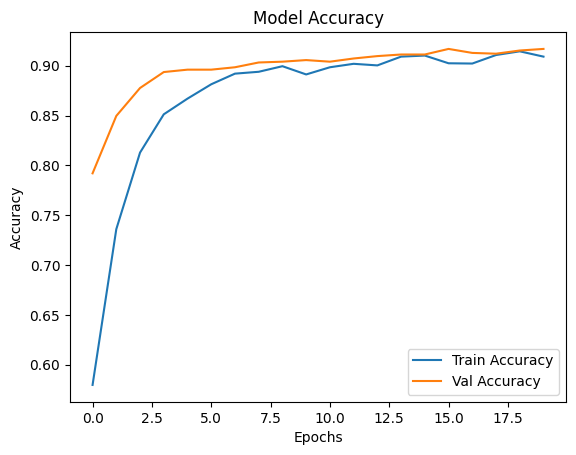

In [151]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

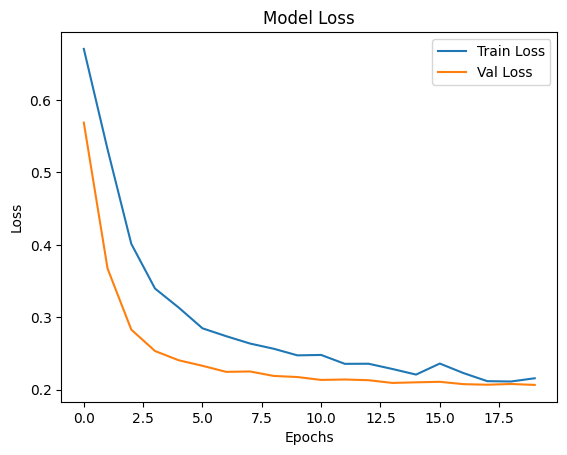

In [152]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [153]:
# Save the trained model

model.save("churn_ann_model.keras")


# ***Prediction***

In [154]:
import joblib

joblib.dump(X.columns.tolist(), 'columns.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [155]:
from tensorflow.keras.models import load_model

model = load_model('churn_ann_model.keras')
scaler = joblib.load('scaler.pkl')
columns = joblib.load('columns.pkl')


In [156]:
def predict_churn(user_input_dict):
    input_df = pd.DataFrame([user_input_dict])
    input_df_encoded = pd.get_dummies(input_df,drop_first=True)

    input_df_encoded = input_df_encoded.reindex(columns=columns, fill_value=0)

    input_scaled = scaler.transform(input_df_encoded)

    prob = model.predict(input_scaled)[0][0]
    label = "Churn" if prob > 0.5 else "Not Churn"

    print(f"Prediction: {label}")


# ***Prediction 1***

In [157]:
sample_input = {
    "age": 28,
    "gender": "Male",
    "subscription_type": "Premium",
    "watch_hours": 40,
    "last_login_days": 1,
    "region": "North",
    "device": "Mobile",
    "monthly_fee": 19.99,
    "payment_method": "UPI",
    "number_of_profiles": 3,
    "avg_watch_time_per_day": 2.5,
    "favorite_genre": "Action"
}

predict_churn(sample_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Prediction: Not Churn


# ***Prediction 2***

In [158]:
sample_input = {
    "age": 30,
    "gender": "Female",
    "subscription_type": "Premium",
    "watch_hours": 15,
    "last_login_days": 12,
    "region": "West",
    "device": "Smart TV",
    "monthly_fee": 15.99,
    "payment_method": "Credit Card",
    "number_of_profiles": 2,
    "avg_watch_time_per_day": 1.8,
    "favorite_genre": "Drama"
}

predict_churn(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Not Churn


# ***Prediction 3***

In [159]:
sample_input = {
    "age": 24,
    "gender": "Male",
    "subscription_type": "Premium",
    "watch_hours": 3,
    "last_login_days": 45,
    "region": "East",
    "device": "Laptop",
    "monthly_fee": 17.99,
    "payment_method": "Credit Card",
    "number_of_profiles": 1,
    "avg_watch_time_per_day": 0.2,
    "favorite_genre": "Documentary"
}

predict_churn(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: Churn
